# Thresholding
Thresholding is used to create a binary image from a grayscale image. It is the simplest way to segment objects from a background.

useful link: http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html

## Global thresholding 

skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_mean


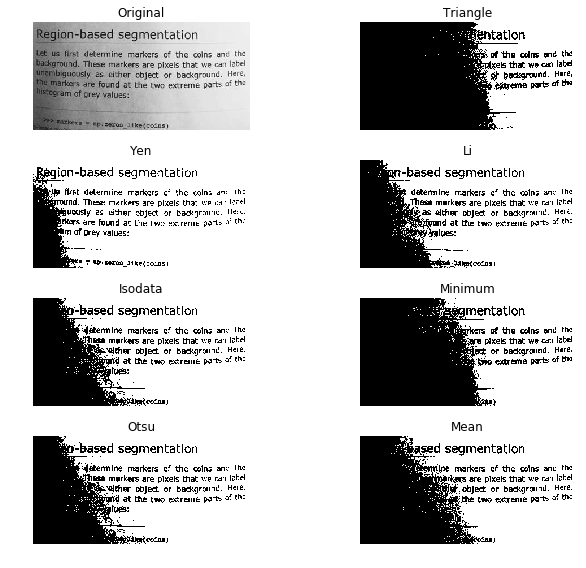

In [135]:
import matplotlib.pyplot as plt
from skimage import data, filters

img = data.page()
fig, ax = filters.try_all_threshold(img, figsize=(10,8),verbose=True)
plt.show()

In [136]:
#skimage.filters.thresholding.threshold_otsu
#skimage.filters.thresholding.threshold_mean

img = data.page()

print("pixel value", img)
print("threshold value", filters.threshold_otsu(img))
print("threshold value", filters.threshold_mean(img))

('pixel value', array([[136, 137, 139, ..., 239, 239, 239],
       [140, 139, 138, ..., 239, 239, 239],
       [142, 140, 137, ..., 239, 239, 239],
       ..., 
       [ 47,  54,  50, ..., 225, 225, 225],
       [ 64,  68,  65, ..., 225, 225, 225],
       [ 63,  60,  57, ..., 225, 225, 225]], dtype=uint8))
('threshold value', 157)
('threshold value', 171.54482984293193)


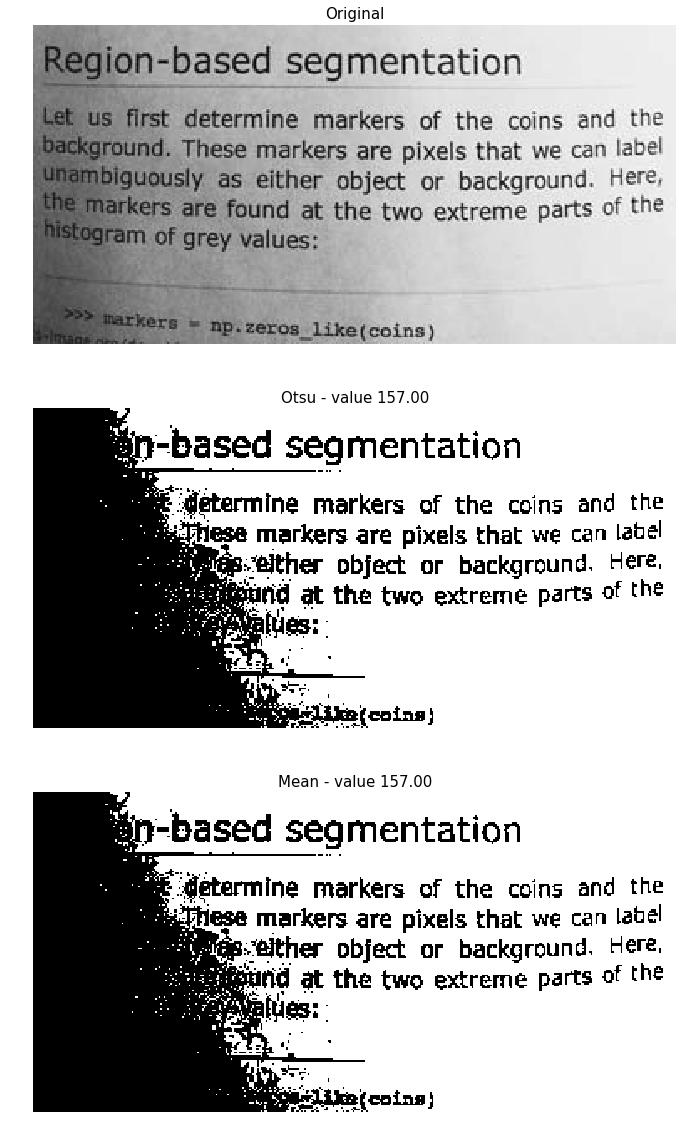

In [32]:
import matplotlib.pyplot as plt
from skimage import data, filters

img = data.page()

# plot graph
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(16,20))   
ax0, ax1, ax2  = axes.flat

ax0.imshow(img, cmap=plt.cm.gray)
ax0.set_title('Original', fontsize=15)
ax0.axis('off') 

thresh_otsu = filters.threshold_otsu(img)
bw_otsu = img > thresh_otsu
ax1.imshow(bw_otsu, cmap=plt.cm.gray)
ax1.set_title('Otsu - value %.2f'%(thresh_otsu), fontsize=15)
ax1.axis('off') 

thresh_mean = filters.threshold_otsu(img)
bw_mean = img > thresh_mean
ax2.imshow(bw_mean, cmap=plt.cm.gray)
ax2.set_title('Mean - value %.2f'%(thresh_mean), fontsize=15)
ax2.axis('off') 

plt.show()

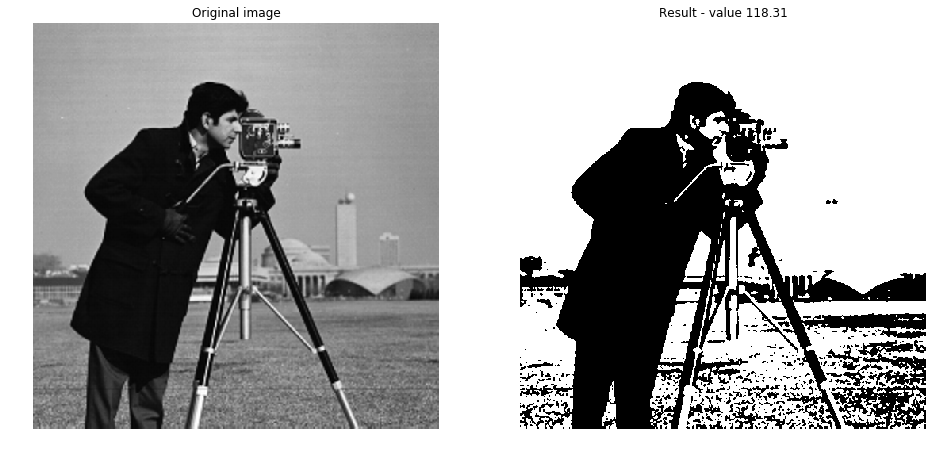

In [137]:
from skimage import data, filters
import matplotlib.pyplot as plt

image = data.camera()
thresh = filters.threshold_mean(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result - value %.2f'%(thresh))

for a in ax:
    a.axis('off')

plt.show()

## Otsu algorithm 

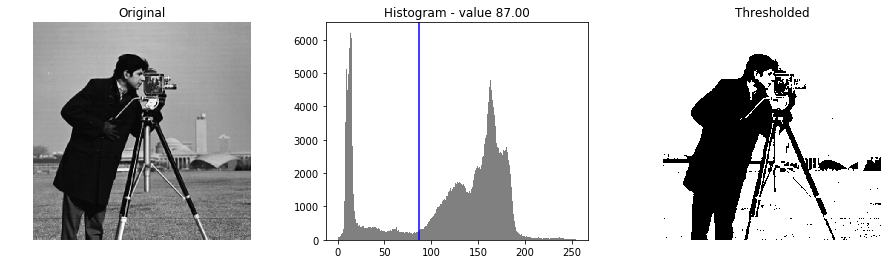

In [138]:
from skimage import data, filters
import matplotlib.pyplot as plt


image = data.camera()
thresh = filters.threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256, color='gray')
ax[1].set_title('Histogram - value %.2f'%(thresh))
ax[1].axvline(thresh, color='b')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

## Local (Adaptive) thresholding 
If the image background is relatively uniform, then you can use a global threshold value as presented above. However, if there is large variation in the background intensity, adaptive thresholding (a.k.a. local or dynamic thresholding) may produce better results. Note that local is much slower than global thresholding.

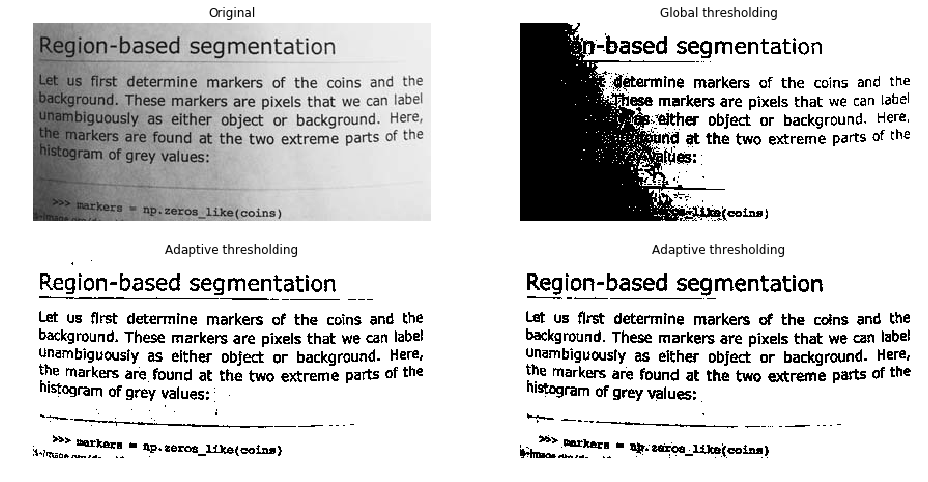

In [139]:
from skimage import data, filters
import matplotlib.pyplot as plt

image = data.page()

#Global threshold
global_thresh = filters.threshold_otsu(image)
binary_global = image > global_thresh

#Adaptive threshold
block_size = 35
adaptive_thresh = filters.threshold_local(image, block_size, offset=10)
binary_adaptive = image > adaptive_thresh

block_size = 101
adaptive_thresh_c = filters.threshold_local(image, block_size, offset=10)
binary_adaptive1 = image > adaptive_thresh_c


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_adaptive)
ax[2].set_title('Adaptive thresholding')

ax[3].imshow(binary_adaptive1)
ax[3].set_title('Adaptive thresholding')

for a in ax:
    a.axis('off')

plt.show()


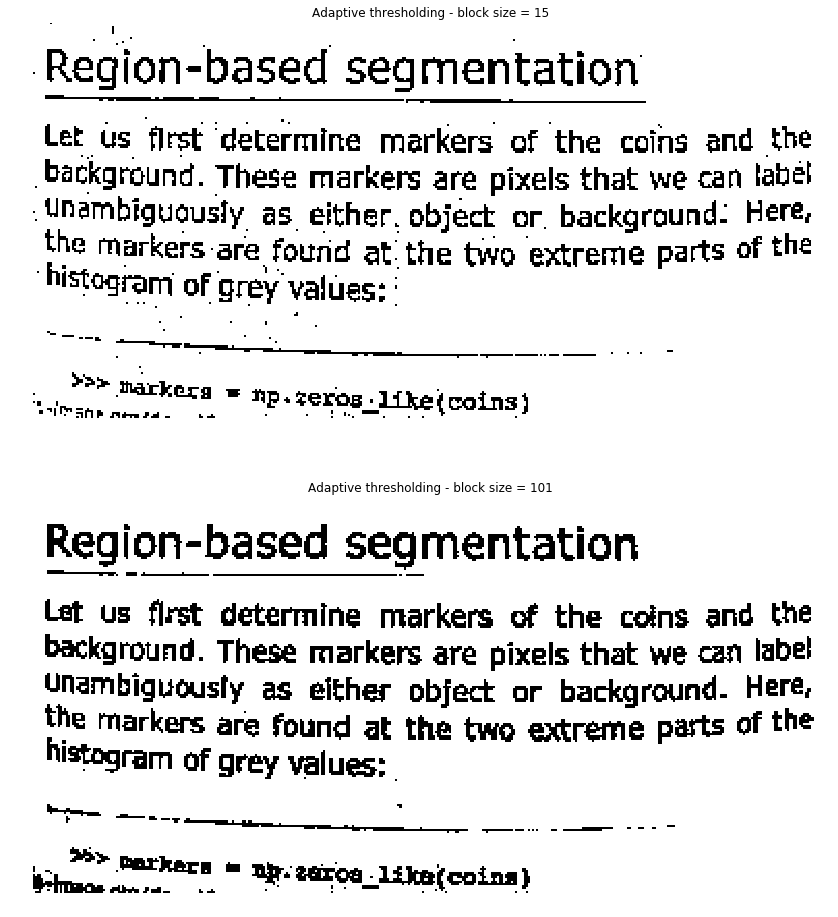

In [140]:
from skimage import data, filters
import matplotlib.pyplot as plt

image = data.page()

#Adaptive threshold
block_size = 15
adaptive_thresh = filters.threshold_local(image, block_size, offset=10)
binary_adaptive = image > adaptive_thresh

block_size1 = 101
adaptive_thresh_c = filters.threshold_local(image, block_size1, offset=10)
binary_adaptive1 = image > adaptive_thresh_c

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))
ax = axes.ravel()
plt.gray()

ax[0].imshow(binary_adaptive)
ax[0].set_title('Adaptive thresholding - block size = %d'%(block_size))

ax[1].imshow(binary_adaptive1)
ax[1].set_title('Adaptive thresholding - block size = %d'%(block_size1))

for a in ax:
    a.axis('off')

plt.show()

## Noise removal
useful link: http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_rank_filters.html#sphx-glr-auto-examples-xx-applications-plot-rank-filters-py

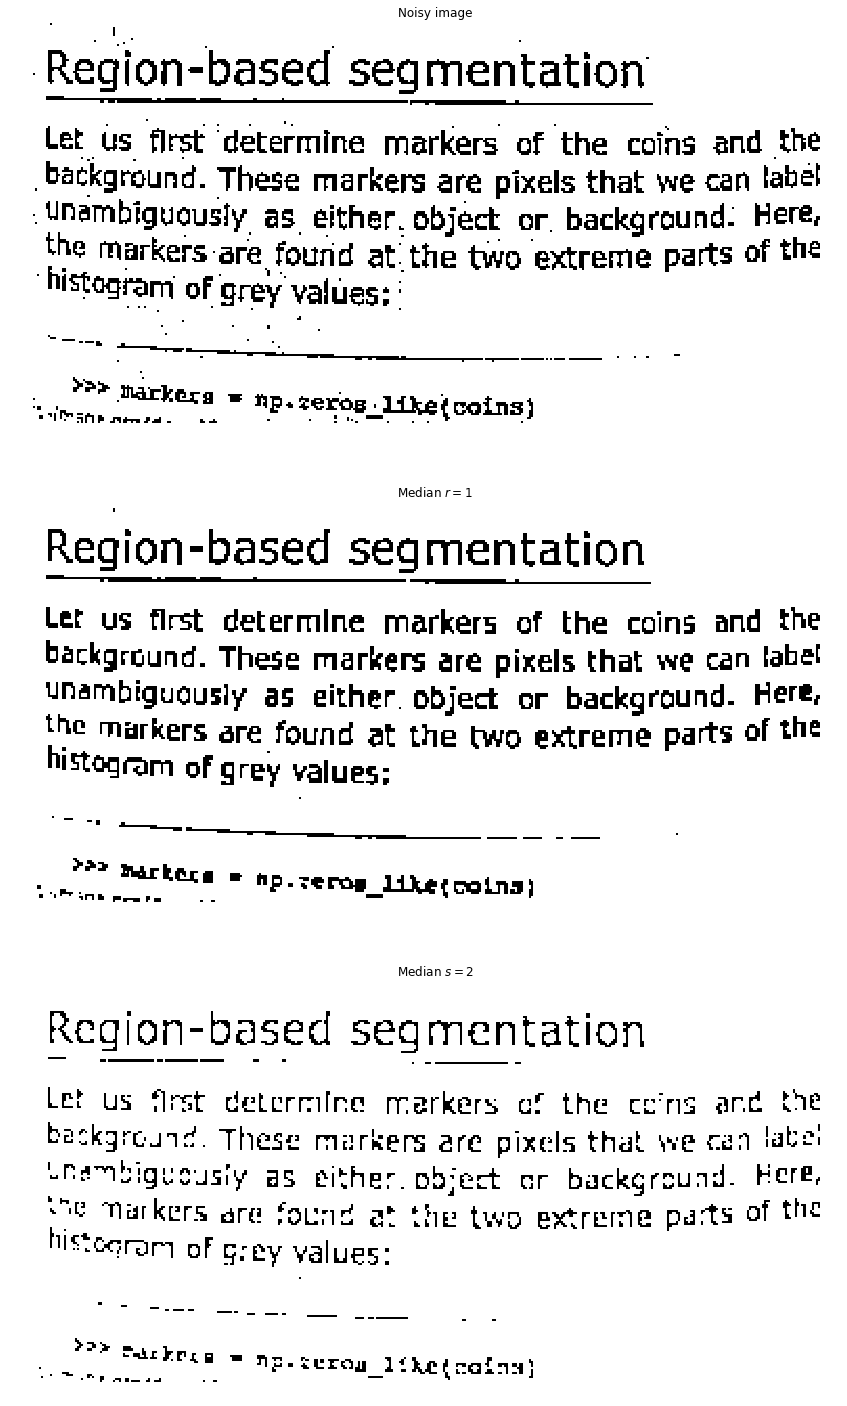

In [141]:
from skimage import data, filters
from skimage.filters.rank import median
from skimage.morphology import disk, square
import matplotlib.pyplot as plt

image = data.page()

#Adaptive threshold
block_size = 15
adaptive_thresh = filters.threshold_local(image, block_size, offset=10)
binary_adaptive = image > adaptive_thresh

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 25))
ax = axes.ravel()

ax[0].imshow(binary_adaptive, cmap=plt.cm.gray)
ax[0].set_title("Noisy image")

r = 1
ax[1].imshow(median(binary_adaptive, disk(r)), cmap=plt.cm.gray)
ax[1].set_title("Median $r=%d$"%(r))

s = 2
ax[2].imshow(median(binary_adaptive, square(s)), cmap=plt.cm.gray)
ax[2].set_title("Median $s=%d$"%(s))

for a in ax:
    a.axis('off')
plt.show()

In [142]:
from skimage.morphology import disk, square

print("disk ")
print morphology.disk(1)

print("\n")
print("square ")
print morphology.square(2)

disk 
[[0 1 0]
 [1 1 1]
 [0 1 0]]


square 
[[1 1]
 [1 1]]
